In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_dec_halooglasi = pd.read_excel('Excel_files\\Data 26.11.2023..xlsx')
df_dec_halooglasi.head(10)


,area,sq_meters,room_number,price,heating,floor,total_floors
0,Opština Čukarica,95 m2,3.0,750€,Gas,2,2.0
1,Opština Novi Beograd,40 m2,1.5,400€,CG,1,5.0
2,Opština Novi Beograd,68 m2,3.0,1.400€,CG,7,7.0
3,Opština Vračar,84 m2,3.0,700€,CG,1,5.0
4,Opština Novi Beograd,40 m2,1.0,900€,CG,17,NaN
5,Opština Novi Beograd,75 m2,3.0,600€,CG,VPR,4.0
6,Opština Savski venac,54 m2,2.0,800€,TA,5,5.0
7,Opština Stari grad,50 m2,2.0,950€,CG,6,NaN
8,Opština Novi Beograd,80 m2,3.0,1.050€,CG,7,8.0
9,Opština Voždovac,50 m2,2.0,350€,NaN,4,NaN


In [37]:
def clean_data(df):
    df = df.copy()
    
    # Including only records where apartment area appears at least 10 times
    area_counts = df['area'].value_counts()
    mask = df['area'].map(area_counts) >= 10
    df = df[mask]

    # Numerical number formating
    # regex=False added in replace method to avoid warining, as in current python project version, regex=True is default
    df['price'] = df['price'].str.replace('€', '', regex=False).str.replace('.', '', regex=False)
    df['sq_meters'] = df['sq_meters'].str.replace(' m2', '', regex=False).str.replace(',', '.', regex=False).str.replace("m²", "", regex=False)
    df['room_number'] = df['room_number'].str.replace('+', '', regex=False)
    df['total_floors'] = df['total_floors'].replace(" ", np.nan, regex=False)
    # df['total_floors'] = df['total_floors'].str
    df['floor'] = df['floor'].replace({'PSUT' : 0, 'PR' : 0, 'VPR' : 0, 'SUT' : 0}, regex=False) 
    df[['price', 'sq_meters', 'room_number', 'floor']] = df[['price', 'sq_meters', 'room_number', 'floor']].astype(float)

    # Formating area column
    df['area'] = df['area'].astype(str)
    df['area'] = df['area'].str.replace('Opština ', '', regex=False)

    # Including only records where apartment heating type appears at least 16 times
    heating_counts = df['heating'].value_counts()
    mask = df['heating'].map(heating_counts) >= 10
    df = df[mask]

    # Sorting and deleting NA records
    df = df.sort_values(by=['price'], ignore_index=True)
    df.dropna(inplace=True)

    return df

In [38]:
# Data description
df_dec_halooglasi_clean = clean_data(df_dec_halooglasi)
df_dec_halooglasi_clean.describe()

,sq_meters,room_number,price,floor,total_floors
count,465.000000,465.000000,465.000000,465.000000,465.000000
mean,61.645527,2.293548,801.578495,2.993548,6.374194
std,24.205904,0.885322,344.762154,3.070641,4.505000
min,15.000000,0.500000,250.000000,0.000000,1.000000
25%,45.000000,2.000000,500.000000,1.000000,4.000000
50%,60.000000,2.000000,750.000000,2.000000,5.000000
75%,72.000000,3.000000,1100.000000,4.000000,7.000000
max,196.000000,5.000000,1500.000000,24.000000,30.000000


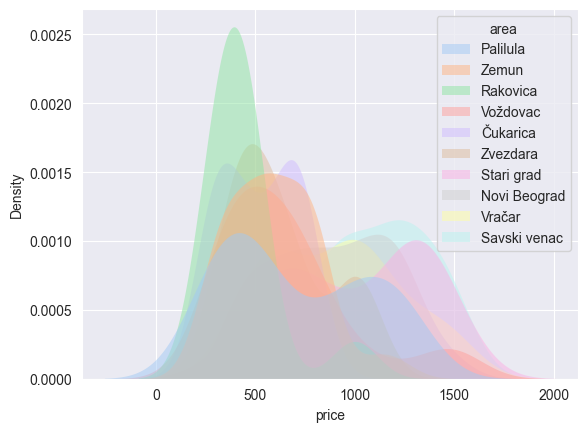

In [39]:
# Distribution check per area
sns.set_style("darkgrid")
sns.set_palette("pastel")

sns.kdeplot(
    data = df_dec_halooglasi_clean,
    x = df_dec_halooglasi_clean['price'],
    hue=df_dec_halooglasi_clean['area'],
    fill=True, 
    common_norm=False, 
    palette="pastel",
    alpha=.5, 
    linewidth=0,
)
plt.show()

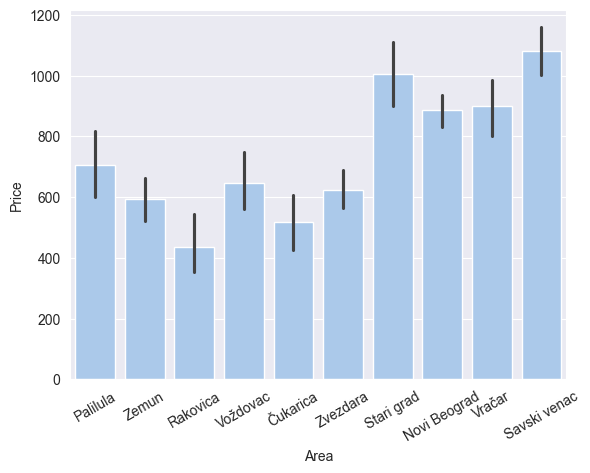

In [40]:
# Mean price per area
sns.barplot(
    data= df_dec_halooglasi_clean,
    x = df_dec_halooglasi_clean['area'],
    y = df_dec_halooglasi_clean['price'],
)
plt.xlabel('Area')
plt.ylabel('Price')
plt.xticks(rotation = 30)
plt.show()

array([[<AxesSubplot:title={'center':'sq_meters'}>,
        <AxesSubplot:title={'center':'room_number'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'total_floors'}>, <AxesSubplot:>]],
      dtype=object)

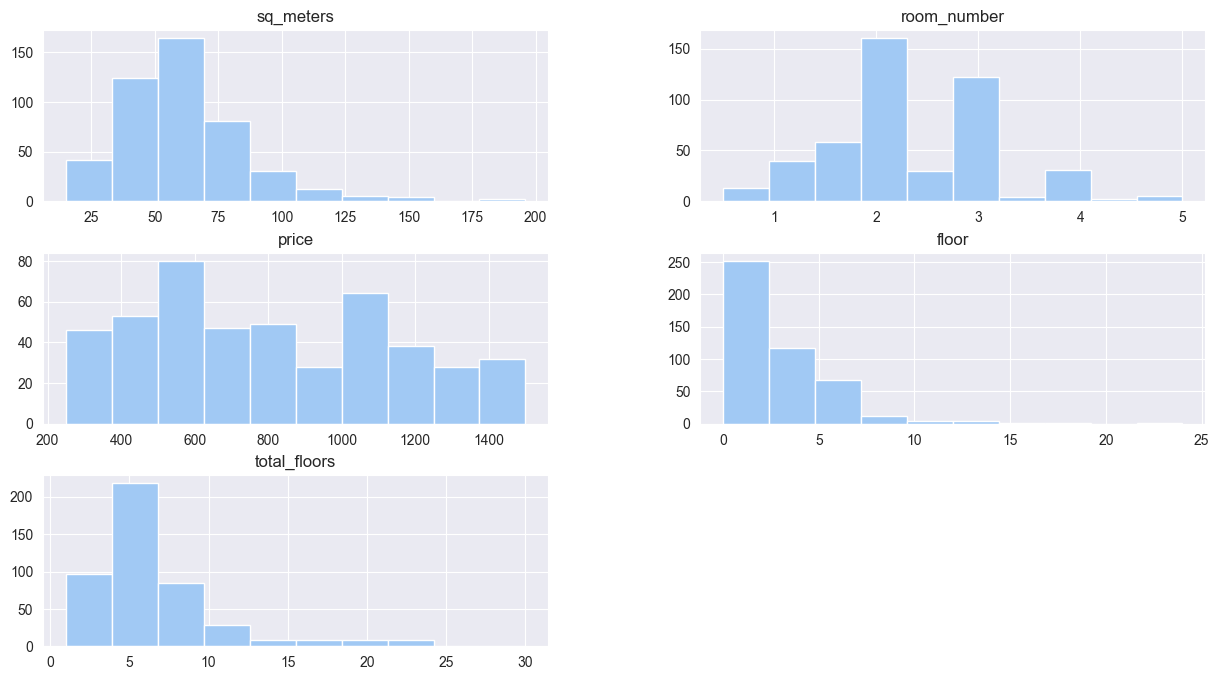

In [41]:
df_dec_halooglasi_clean.hist(figsize=(15, 8))

In [42]:
### Data cleaining for January
df_jan_halooglasi = pd.read_excel('Excel_files\\Data 04.01.2024..xlsx')
df_jan_halooglasi_clean = clean_data(df_jan_halooglasi)
# Data description
df_jan_halooglasi_clean.describe()

,sq_meters,room_number,price,floor,total_floors
count,428.000000,428.000000,428.000000,428.000000,428.000000
mean,58.052507,2.196262,755.663551,2.820093,6.168224
std,20.350046,0.827674,321.195066,2.313360,3.945735
min,3.543000,0.500000,250.000000,0.000000,1.000000
25%,45.000000,2.000000,500.000000,1.000000,4.000000
50%,55.000000,2.000000,700.000000,2.000000,5.000000
75%,70.000000,3.000000,1000.000000,4.000000,7.000000
max,140.000000,5.000000,1500.000000,12.000000,30.000000


In [43]:
# Avregare prices comparison between December and January for Halooglasi.com
mean_prices_dec_halooglasi = df_dec_halooglasi_clean.groupby('area')['price'].mean().reset_index()
mean_prices_dec_halooglasi = mean_prices_dec_halooglasi.rename(columns={'price': "price December"})
mean_prices_jan_halooglasi = df_jan_halooglasi_clean.groupby('area')['price'].mean().reset_index()
mean_prices_jan_halooglasi = mean_prices_jan_halooglasi.rename(columns={'price': "price January"})
mean_prices_comp = mean_prices_dec_halooglasi.merge(mean_prices_jan_halooglasi, on='area', how='outer')
mean_prices_comp = mean_prices_comp.dropna()
mean_prices_comp['percentage_change'] = ((mean_prices_comp['price January'] - mean_prices_comp['price December']) / mean_prices_comp['price December']) * 100
mean_prices_comp['percentage_change'] = mean_prices_comp['percentage_change'].map('{:.2f}%'.format)
print(mean_prices_comp)


           area  price December  price January percentage_change
0  Novi Beograd      887.209302     839.423077            -5.39%
1      Palilula      707.317073     650.303030            -8.06%
3  Savski venac     1082.600000    1062.763158            -1.83%
4    Stari grad     1004.358974     956.923077            -4.72%
5      Voždovac      647.200000     659.791667             1.95%
6        Vračar      898.604651     785.000000           -12.64%
7         Zemun      593.421053     533.333333           -10.13%
8      Zvezdara      624.200000     629.128571             0.79%
9      Čukarica      517.647059     532.608696             2.89%


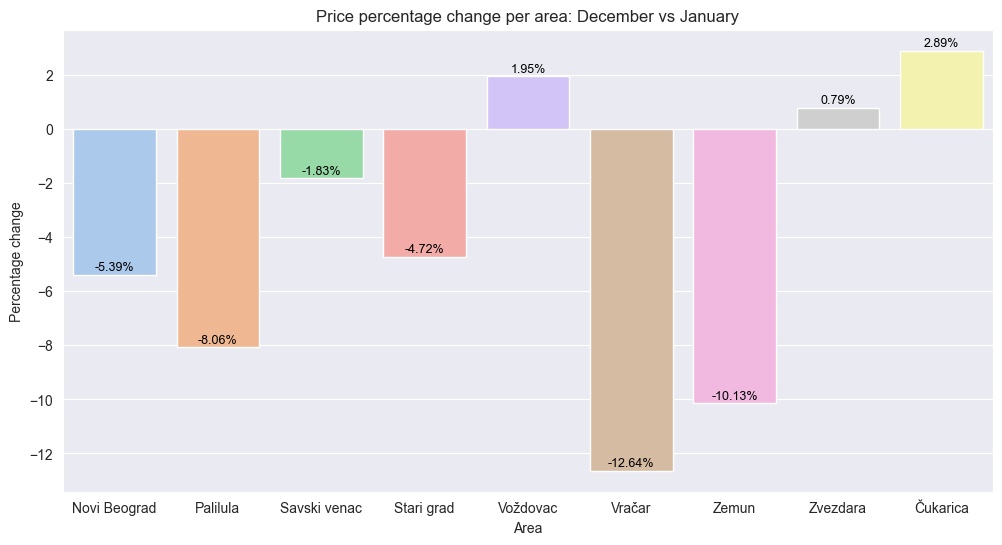

In [44]:
# Visualization of price comparison between December and January per area
mean_prices_comp['percentage_change'] = mean_prices_comp['percentage_change'].str.replace("%", "")
mean_prices_comp['percentage_change'] = mean_prices_comp['percentage_change'].astype(float)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='area', y="percentage_change", data=mean_prices_comp, errorbar=None, palette="pastel", hue='area', legend=False)

plt.title("Price percentage change per area: December vs January")
plt.xlabel("Area")
plt.ylabel("Percentage change")

# Add annotations with differences above the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [45]:
### Cleaning of data from Nekretnine.rs
data_jan_nekretnine = pd.read_excel("Excel_files\\Data nekretnine.xlsx")
# Update area namings to adjust to data from halooglasi.com before combining data sets
def update_area(value):
    if "Zemun" in value:
        return "Opština Zemun"
    elif any(char in value for char in ['Cvetkova pijaca', 'Učiteljsko naselje', 'Đeram pijaca', 'Lion', 'Vukov', 'mokri', 'Kalenić']):
        return "Opština Zvezdara"
    elif any(char in value for char in ['Neimar', 'Čubura', 'Autokomanda', 'Južni bulevar', 'Centar',  'Slavija', "Crveni krst"]):
        return "Opština Vračar"
    elif any(char in value for char in ['Stari Grad', 'Dorćol']):
        return "Opština Stari grad"
    elif any(char in value for char in ['Senjak', 'Klinički centar', 'Savski', 'na vodi']):
        return "Opština Savski venac"
    elif any(char in value for char in ['Tošin bunar', 'Novi Beograd', 'Bežanijska kosa III']):
        return "Opština Novi Beograd"
    elif any(char in value for char in ['Cerak', 'Žarkovo', "Banovo brdo", "Čukarička padina"]):
        return "Opština Čukarica"
    elif any(char in value for char in ['Lekino brdo', 'Voždovac', 'Braće Jerković']):
        return "Opština Voždovac"
    elif "Tašmajdan" in value:
        return "Opština Palilula"
    else:
        return value

# Update heating method of apartment to adjust to data from halooglasi.com before combining data sets
def update_heating(value):
    if "Centralno" in value:
        return "CG"
    elif "Etažno" in value:
        return "EG"
    elif "TA peć" in value:
        return "TA"
    else:
        return np.nan

def clean_data_nekretnine(df): 
    df = df.copy()   
    df['area'] = df["area"].apply(update_area)
    df['heating'] = df["heating"].apply(update_heating)
    df = df[df['floor'] != "- "]
    df['floor'] = df['floor'].apply(lambda x: 0 if 'rizemlje' in str(x) else x)
    df['floor'] = pd.to_numeric(df['floor'], errors='coerce')
    df['floor'] = df['floor'].replace(-1, np.nan)
    df['total_floors'] = df['total_floors'].replace(' -', np.nan)
    df['room_number'] = df['room_number'].replace('-', np.nan)
    df.dropna(subset=['floor', 'heating', 'total_floors', 'room_number'], inplace=True)
    df['floor'] = df['floor'].astype(int)
    df = df[~df['area'].str.startswith('Beograd')]
    df['price'] = df['price'].astype(str)
    df['price'] = df['price'].str.replace(" ", "")

    return df

data_jan_nekretnine_clean = clean_data_nekretnine(data_jan_nekretnine)
data_jan_nekretnine_clean = clean_data(data_jan_nekretnine_clean)

In [46]:
# Preparing data to compare mean prices for January for websites Nekretnine.rs and Halooglasi.com
mean_prices_jan_nekretnine = data_jan_nekretnine_clean.groupby('area')['price'].mean().reset_index()
mean_prices_jan_nekretnine = mean_prices_jan_nekretnine.rename(columns={'price' : "price Nekretnine"})
mean_prices_jan_halooglasi = mean_prices_jan_halooglasi.rename(columns={'price January': "price Halooglasi"})
mean_prices_jan_grouped = mean_prices_jan_halooglasi.merge(mean_prices_jan_nekretnine, how='outer', on='area')
mean_prices_jan_grouped.dropna(subset=['price Nekretnine'], inplace=True)
mean_prices_jan_grouped.head(50)


,area,price Halooglasi,price Nekretnine
0,Novi Beograd,839.423077,873.953488
2,Savski venac,1062.763158,1123.809524
3,Stari grad,956.923077,1030.952381
4,Voždovac,659.791667,729.687500
5,Vračar,785.000000,887.676923
6,Zemun,533.333333,600.000000
7,Zvezdara,629.128571,755.161290


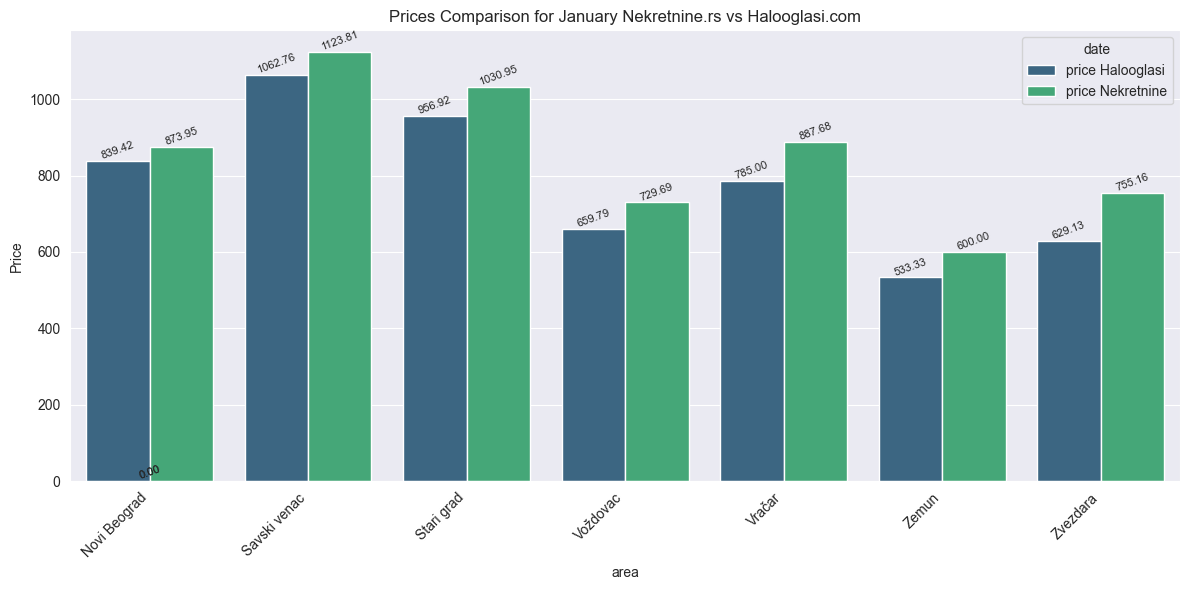

In [47]:
# Visual representation of average price comparison between Halooglasi.com and Nekretnine.rs for January 2024
mean_prices_comp_melted = pd.melt(mean_prices_jan_grouped[['area', 'price Halooglasi', 'price Nekretnine']], id_vars=['area'], var_name='date', value_name='price')
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='area', y='price', hue='date', data=mean_prices_comp_melted, palette='viridis')

# Add annotations with differences above the bars
for p in ax.patches:
    height = p.get_height()
    width = p.get_x() + p.get_width() / 2

    ax.annotate(f'{height:.2f}', (width, height), ha='center', va='bottom', rotation=20, fontsize=8)

plt.title('Prices Comparison for January Nekretnine.rs vs Halooglasi.com')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

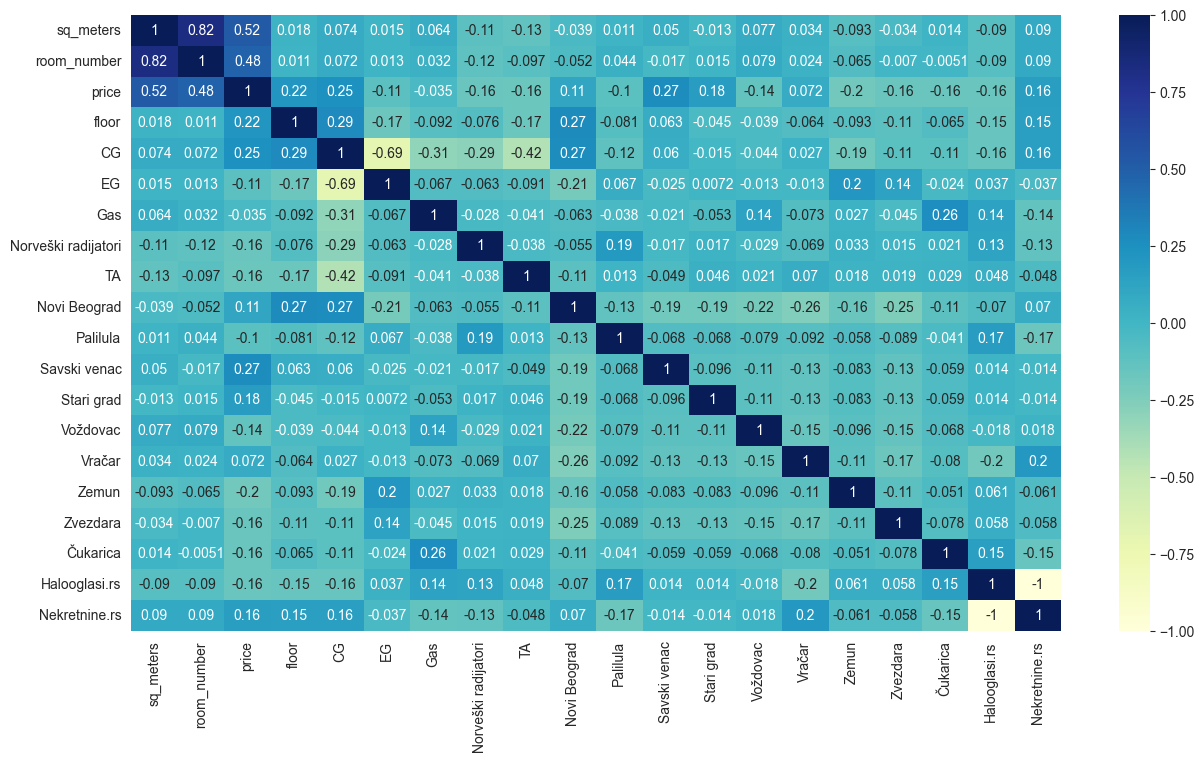

In [48]:
# Preparing data for price prediction
data_jan_nekretnine_clean['website'] = 'Nekretnine.rs'
df_jan_halooglasi_clean['website'] = 'Halooglasi.rs'
data_grouped = pd.concat([data_jan_nekretnine_clean, df_jan_halooglasi_clean], ignore_index=True)
data_grouped = data_grouped.drop_duplicates()
df_processed = data_grouped.join(pd.get_dummies(data_grouped.heating)).drop(['heating'], axis=1)
df_processed = df_processed.join(pd.get_dummies(df_processed.area)).drop(['area'], axis = 1)
df_processed = df_processed.join(pd.get_dummies(df_processed.website)).drop(['website'], axis = 1)

# Correlation matrix to identifying relationships for price prediction
plt.figure(figsize=(15, 8))
sns.heatmap(df_processed.corr(), annot=True, cmap='YlGnBu')
df_processed.to_excel("Excel_files\\Processed data combined.xlsx", index=False)